In [41]:
import pandas as pd

# Dataset from Kaggle: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db
df = pd.read_csv('SpotifyFeatures.csv')

In [43]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df = df
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [47]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

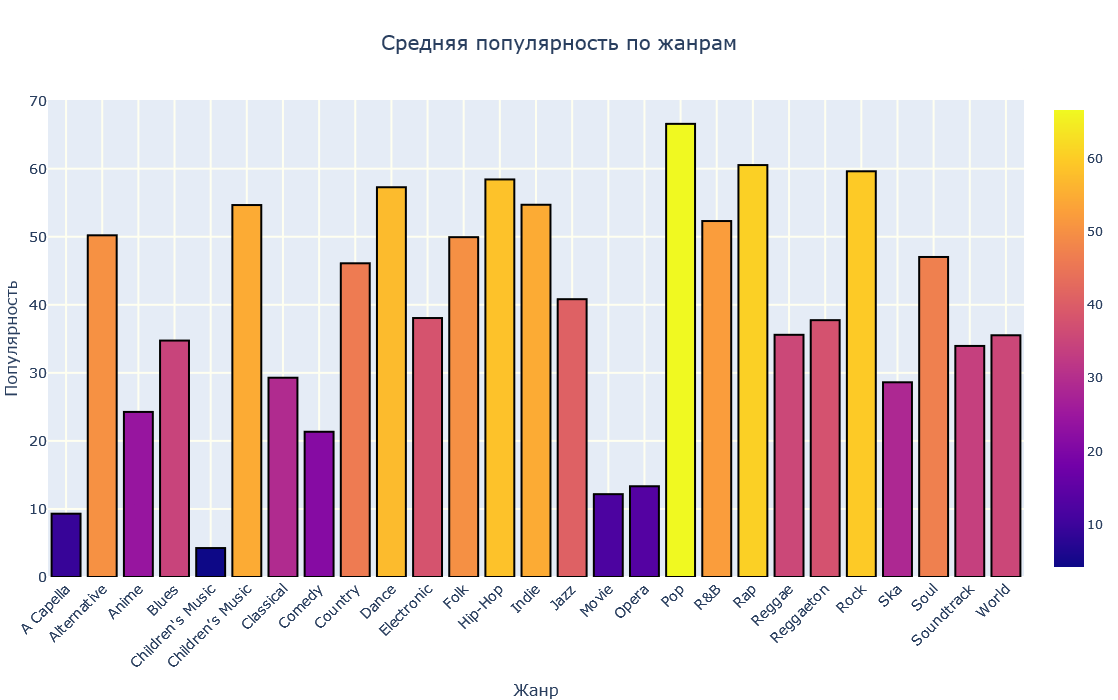

In [49]:
import plotly.graph_objs as go

# Группировка данных по жанру, и подсчет средней популярности
df_grouped = df.groupby('genre')['popularity'].mean().reset_index()

# Построение столбчатой диаграммы
bars = go.Bar(
    x=df_grouped['genre'], 
    y=df_grouped['popularity'], 
    marker=dict(
        color=df_grouped['popularity'],
        coloraxis="coloraxis",
        line=dict(color='black', width=2)
    )
)

# Настройка макета
layout = go.Layout(
    title=dict(
        text='Средняя популярность по жанрам', 
        x=0.5,  # По центру
        font=dict(size=20)
    ),
    xaxis=dict(
        title='Жанр',
        tickangle=315,
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory',
    ),
    yaxis=dict(
        title='Популярность',
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory',
    ),
    width=1000,
    height=700,
    margin=dict(l=0, r=0)
)

# Создание фигуры
fig = go.Figure(data=[bars], layout=layout)

# Отображение графика
fig.show()


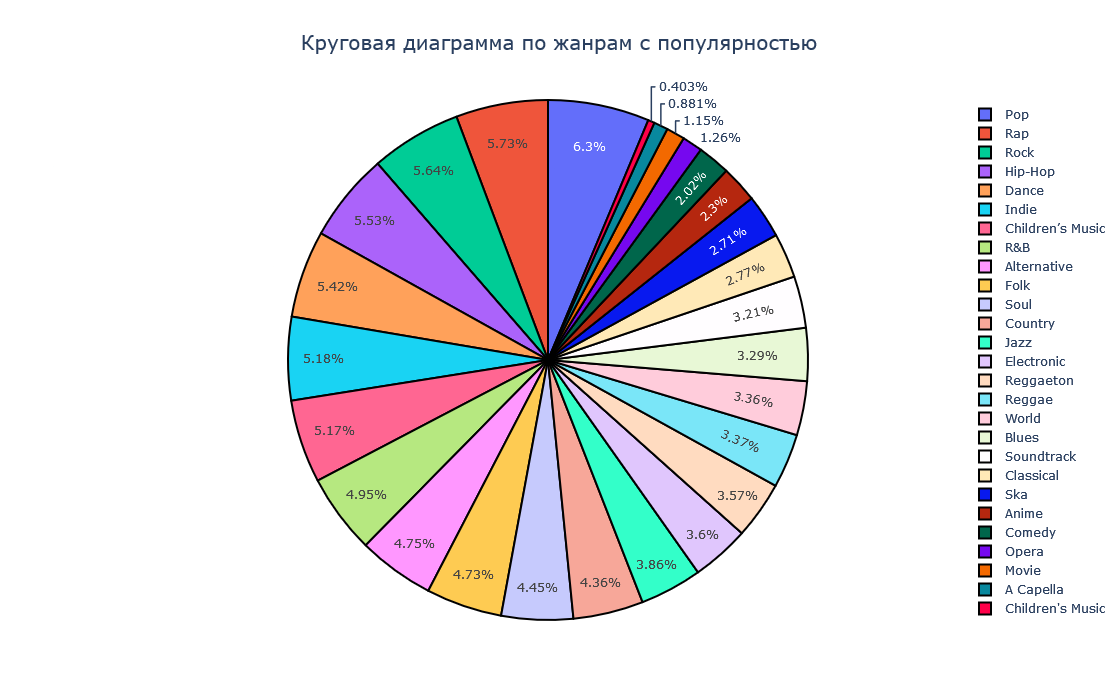

In [7]:
total_popularity = df_grouped['popularity'].sum()
df_grouped['percentage'] = (df_grouped['popularity'] / total_popularity) * 100

# Построение круговой диаграммы
pie = go.Pie(
    labels=df_grouped['genre'],
    values=df_grouped['popularity'],
    marker=dict(
        line=dict(color='black', width=2)
    ),
    hoverinfo='label+value+percent'  # Информация при наведении
)

# Настройка макета
layout = go.Layout(
    title=dict(
        text='Круговая диаграмма по жанрам с популярностью', 
        x=0.5,  # По центру
        font=dict(size=20)
    ),
    width=1000,
    height=700,
    margin=dict(l=0, r=0)
)

# Создание фигуры
fig = go.Figure(data=[pie], layout=layout)

# Отображение графика
fig.show()

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

# Параметры запроса
symbol = "HMSTRUSDT"
interval = "12h"

# Временные метки для начала и конца (26 сентября 2023 - 00:00:00 до 30 сентября 2023 - 23:59:59)
start_str = "2024-09-25 00:00:00"
end_str = "2024-09-30 23:59:59"

# Конвертируем даты в Unix timestamp в миллисекундах
start_time = int(time.mktime(time.strptime(start_str, "%Y-%m-%d %H:%M:%S")) * 1000)
end_time = int(time.mktime(time.strptime(end_str, "%Y-%m-%d %H:%M:%S")) * 1000)

url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}"


# GET-запрос
response = requests.get(url)
data = response.json()

columns = [
    "Open Time", "Open", "High", "Low", "Close", "Volume", 
    "Close Time", "Quote Asset Volume", "Number of Trades", 
    "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore"
]

df1 = pd.DataFrame(data, columns=columns)

df1["Open Time"] = pd.to_datetime(df1["Open Time"], unit='ms')
df1["Close Time"] = pd.to_datetime(df1["Close Time"], unit='ms')
df1['Open'] = pd.to_numeric(df1['Open'], errors='coerce')
df1['High'] = pd.to_numeric(df1['High'], errors='coerce')
df1['Low'] = pd.to_numeric(df1['Low'], errors='coerce')
df1['Close'] = pd.to_numeric(df1['Close'], errors='coerce')

# Выводим DataFrame
df1.head()

Open Time      Open      High       Low     Close          Volume  \
0 2024-09-26 12:00:00  0.001000  0.014149  0.001000  0.006490  45713672135.00   
1 2024-09-27 00:00:00  0.006492  0.007277  0.006279  0.006800  15734812934.00   
2 2024-09-27 12:00:00  0.006800  0.006977  0.006460  0.006800   9040687864.00   
3 2024-09-28 00:00:00  0.006800  0.007093  0.006324  0.006576   8077853603.00   
4 2024-09-28 12:00:00  0.006576  0.006657  0.006216  0.006363   4120730031.00   

               Close Time  Quote Asset Volume  Number of Trades  \
0 2024-09-26 23:59:59.999  371317580.12731700           3701888   
1 2024-09-27 11:59:59.999  107881431.61749200            704351   
2 2024-09-27 23:59:59.999   60972627.99250000            464295   
3 2024-09-28 11:59:59.999   54474631.12461300            405201   
4 2024-09-28 23:59:59.999   26761117.97840800            243021   

  Taker Buy Base Asset Volume Taker Buy Quote Asset Volume Ignore  
0              23546722575.00           191200767.36801400      0  
1               7973050627.00            54652410.37938600      0  
2               4653493091.00            31403044.42149300      0  
3               3850126479.00            26012903.17227900      0  
4               1891109285.00            12275961.10893200      0

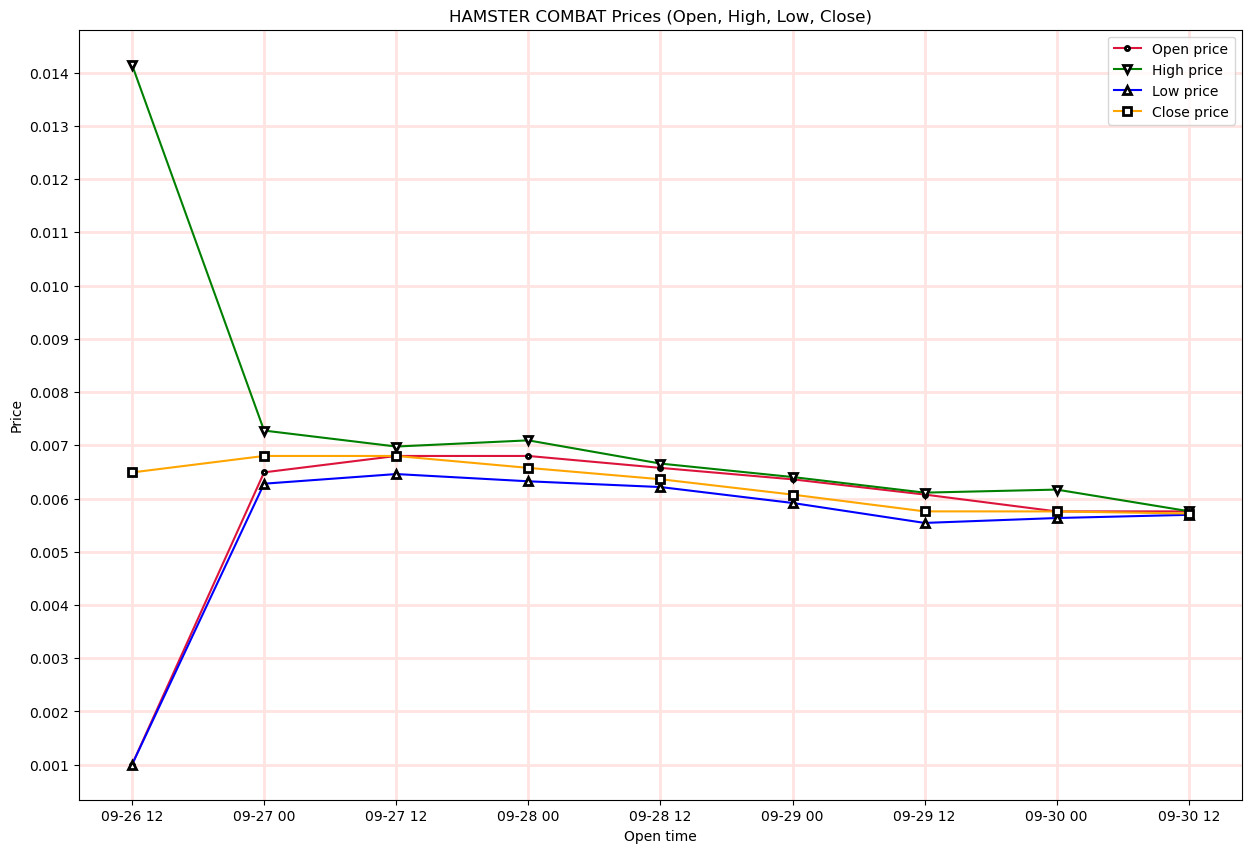

In [244]:
# Задаем размер графика
plt.figure(figsize=(15, 10))

# График для цены открытия (Open price)
plt.plot(df1['Open Time'], df1['Open'], label='Open price', color='crimson', marker='.',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# График для максимальной цены (High price)
plt.plot(df1['Open Time'], df1['High'], label='High price', color='green', marker='v',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# График для минимальной цены (Low price)
plt.plot(df1['Open Time'], df1['Low'], label='Low price', color='blue', marker='^',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# График для цены закрытия (Close price)
plt.plot(df1['Open Time'], df1['Close'], label='Close price', color='orange', marker='s',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.yticks(np.arange(min(df1['Low']), max(df1['High']), 0.001))

# Добавляем сетку
plt.grid(True, linewidth=2, color='mistyrose')

# Добавляем подписи осей
plt.xlabel('Open time')
plt.ylabel('Price')

# Заголовок графика
plt.title('HAMSTER COMBAT Prices (Open, High, Low, Close)')

# Добавляем легенду
plt.legend()

# Показать график
plt.show()

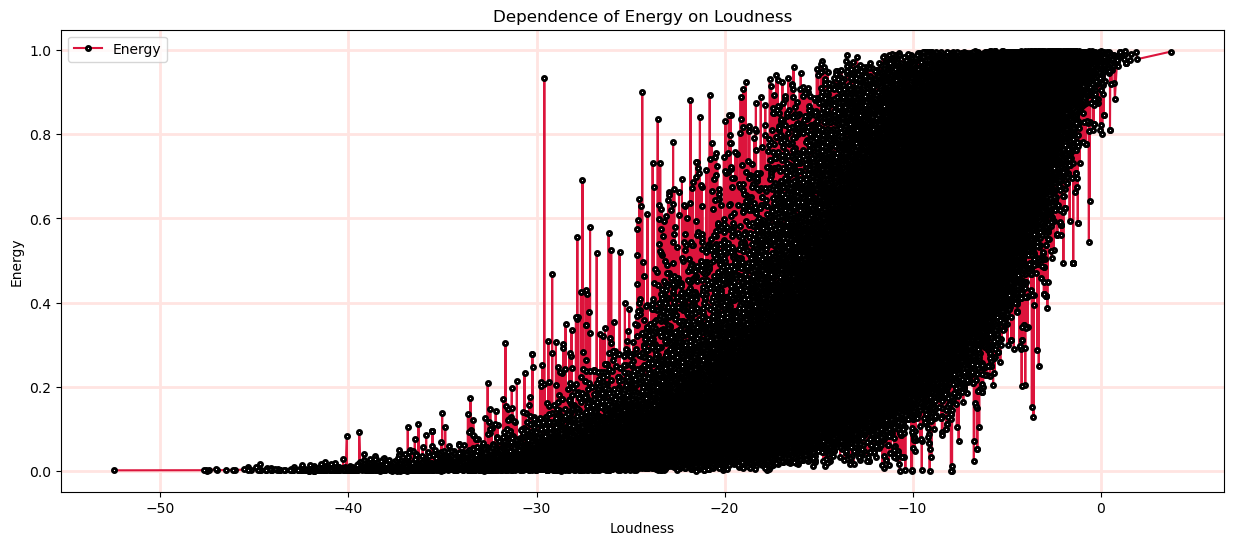

In [9]:
df1 = df.sort_values(by='loudness', ascending=False)

plt.figure(figsize=(15, 6))

plt.plot(df1['loudness'], df1['energy'], label='Energy', color='crimson', marker='.',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.grid(True, linewidth=2, color='mistyrose')


plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Dependence of Energy on Loudness')

# Легенда
plt.legend()

# Показать график
plt.show()

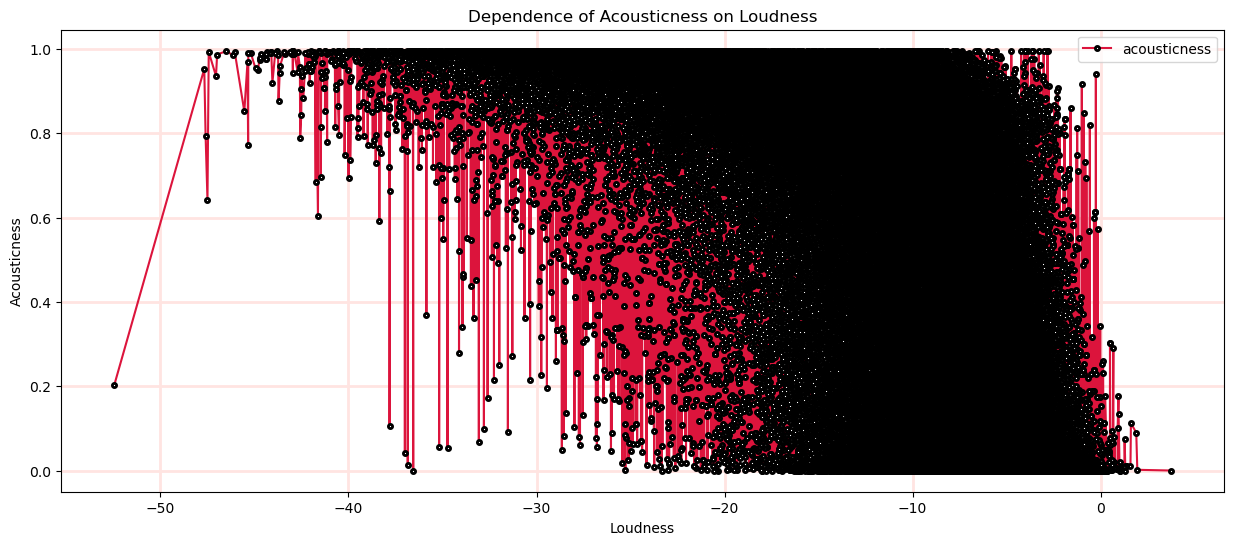

In [10]:
df1 = df.sort_values(by='loudness', ascending=False)

plt.figure(figsize=(15, 6))

plt.plot(df1['loudness'], df1['acousticness'], label='acousticness', color='crimson', marker='.',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.grid(True, linewidth=2, color='mistyrose')


plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.title('Dependence of Acousticness on Loudness')

# Легенда
plt.legend()

# Показать график
plt.show()

from sklearn.manifold import TSNE
import plotly.express as px

# Извлечение только нужных признаков из датасета
X = df[features].values

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Добавляем результат t-SNE к исходному датафрейму для визуализации
df['tsne-2d-one'] = X_tsne[:, 0]
df['tsne-2d-two'] = X_tsne[:, 1]

# Построение визуализации с использованием Plotly
fig = px.scatter(
    df, 
    x='tsne-2d-one', 
    y='tsne-2d-two', 
    color='genre',  # Цвет по жанру, можно изменить на другой параметр
    title="Визуализация данных с использованием t-SNE",
    width=1000,
    height=700
)

# Отображение графика
fig.show()

In [57]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
import umap.umap_ as umap
import seaborn as sns



In [3]:
!pip install tensorflow
from tensorflow.keras.datasets import fashion_mnist

In [89]:
(train_images, train_labels), _ = fashion_mnist.load_data()
train_labels = [{
                0: 'Футболка',
                1: 'Шорты',
                2: 'Свитер',
                3: 'Платье',
                4: 'Плащ',
                5: 'Сандали',
                6: 'Рубашка',
                7: 'Кроссовки',
                8: 'Сумка',
                9: 'Ботинки'}[i]
                for i in train_labels]
train_images_flat = train_images.reshape(train_images.shape[0], -1)

In [118]:
# Стандартизация данных
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)

# Функция для выполнения и замера времени t-SNE
def run_tsne(perplexity):
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_results = tsne.fit_transform(train_images_scaled)
    end_time = time.time()
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=train_labels, palette='Paired', legend='full')
    plt.title(f't-SNE with perplexity={perplexity}')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.grid(True)
    plt.show()
    
    return end_time - start_time

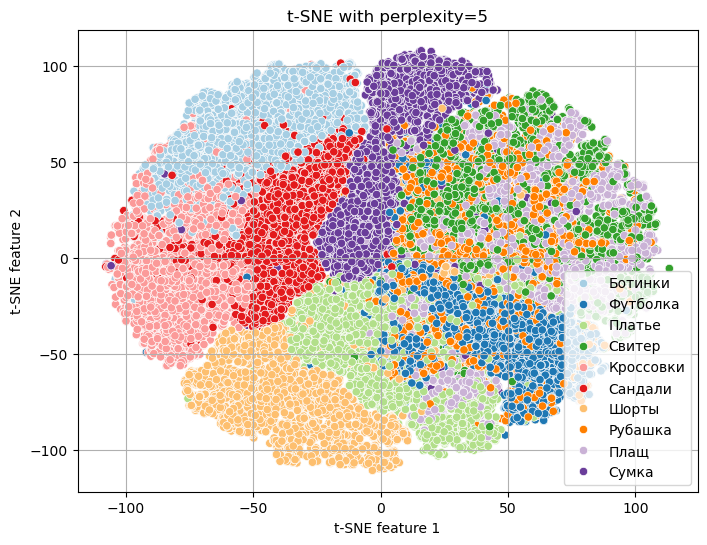

t-SNE took 177.30 seconds


In [120]:
time_taken = run_tsne(perplexity=5)
print(f"t-SNE took {time_taken:.2f} seconds")

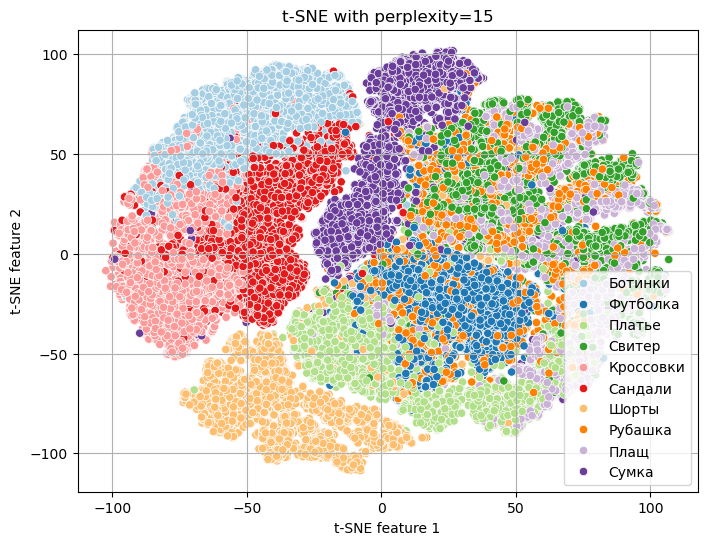

t-SNE took 196.81 seconds


In [121]:
time_taken = run_tsne(perplexity=15)
print(f"t-SNE took {time_taken:.2f} seconds")

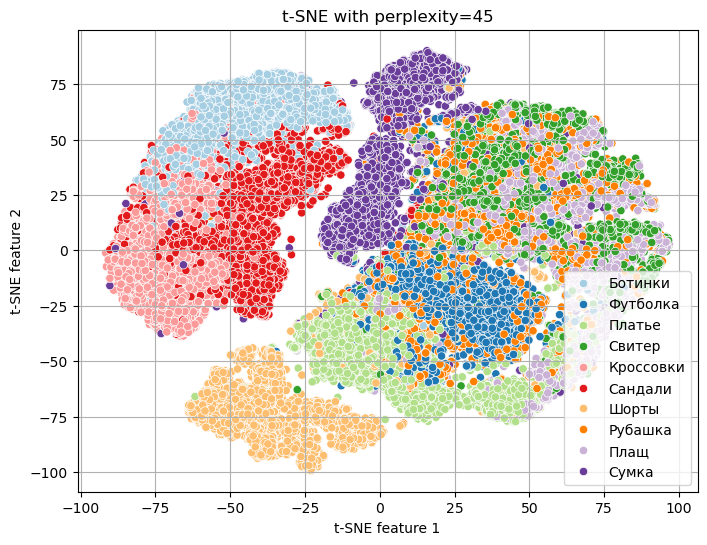

t-SNE took 236.53 seconds


In [122]:
time_taken = run_tsne(perplexity=45)
print(f"t-SNE took {time_taken:.2f} seconds")

In [114]:
# Функция для выполнения и замера времени UMAP
def run_umap(n_neighbors, min_dist):
    start_time = time.time()
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=0)
    umap_results = reducer.fit_transform(train_images_scaled)
    end_time = time.time()
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=train_labels, palette='Paired', legend='full')
    plt.title(f'UMAP visualization (n_neighbors={n_neighbors}, min_dist={min_dist})')
    plt.xlabel('UMAP feature 1')
    plt.ylabel('UMAP feature 2')
    plt.grid(True)
    plt.show()
    
    return end_time - start_time

C:\Users\razch\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



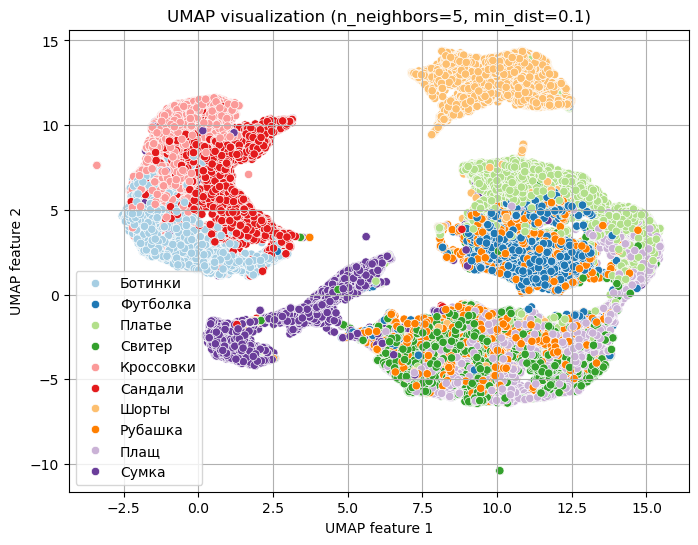

UMAP (n_neighbors=5, min_dist=0.1) time: 29.80 seconds


In [116]:
umap_time_1 = run_umap(n_neighbors=5, min_dist=0.1)
print(f"UMAP (n_neighbors=5, min_dist=0.1) time: {umap_time_1:.2f} seconds")

C:\Users\razch\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



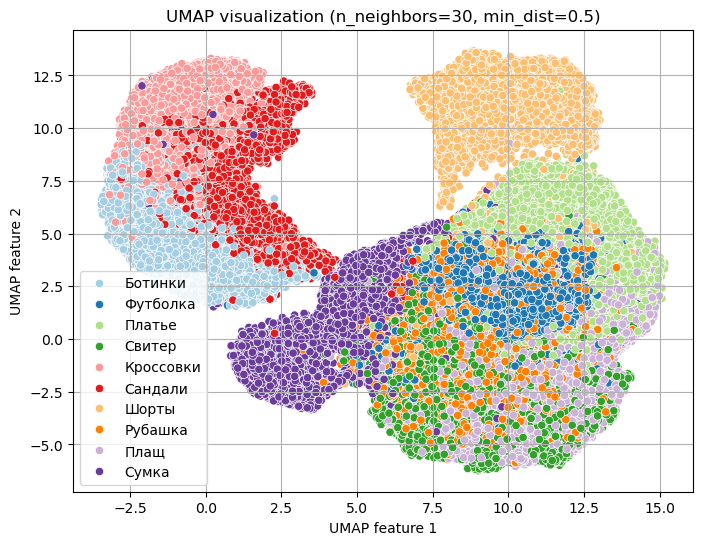

UMAP (n_neighbors=30, min_dist=0.5) time: 59.34 seconds


In [123]:
umap_time_2 = run_umap(n_neighbors=30, min_dist=0.5)
print(f"UMAP (n_neighbors=30, min_dist=0.5) time: {umap_time_2:.2f} seconds")

C:\Users\razch\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



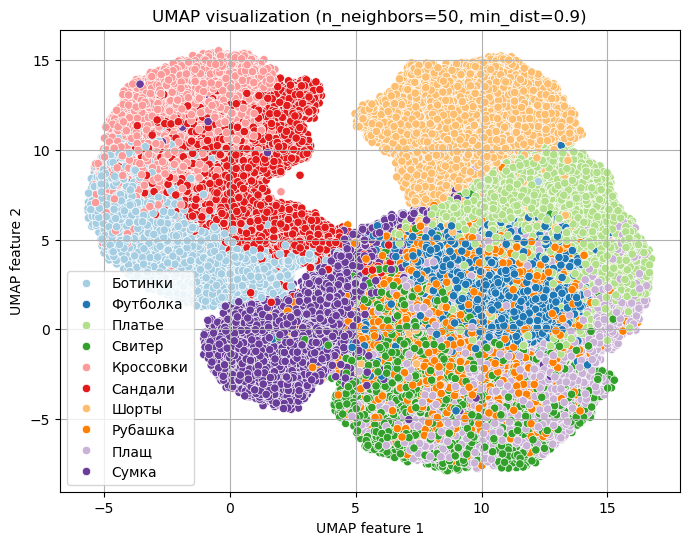

UMAP (n_neighbors=50, min_dist=0.9) time: 78.95 seconds


In [124]:
umap_time_3 = run_umap(n_neighbors=50, min_dist=0.9)
print(f"UMAP (n_neighbors=50, min_dist=0.9) time: {umap_time_3:.2f} seconds")

C:\Users\razch\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



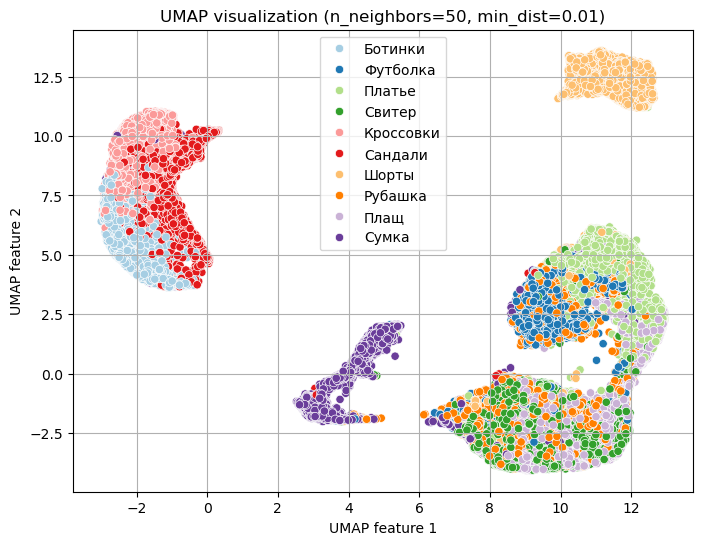

UMAP (n_neighbors=50, min_dist=0.9) time: 79.43 seconds


In [125]:
umap_time_3 = run_umap(n_neighbors=50, min_dist=0.01)
print(f"UMAP (n_neighbors=50, min_dist=0.9) time: {umap_time_3:.2f} seconds")